TITANIC : ML from Disaster

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/Ceyhun/ML/csv files/Titanic.csv')

In [ ]:
df.info()

In [ ]:
df.describe()

In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# EDA PART

In [6]:
pd.isnull(df).sum() # returns null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

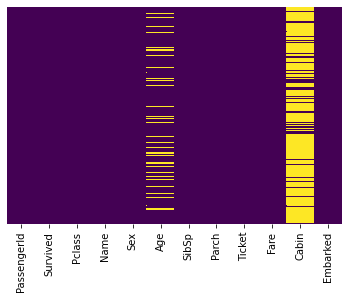

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

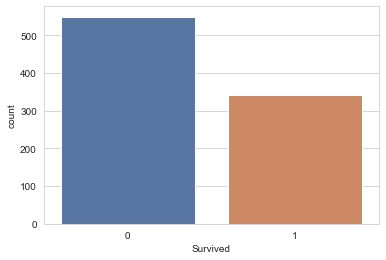

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = df, palette = "deep")

<AxesSubplot:xlabel='Survived', ylabel='count'>

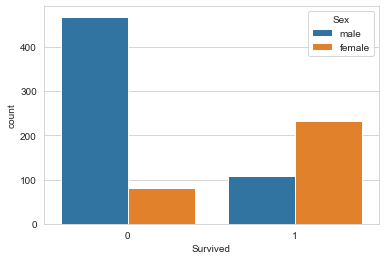

In [9]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

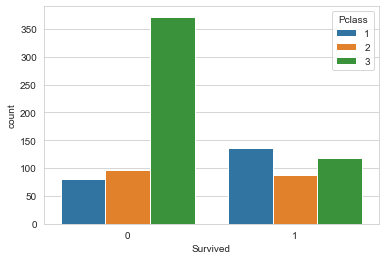

In [10]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

<AxesSubplot:xlabel='Age'>

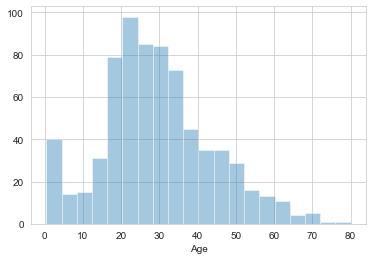

In [11]:
sns.distplot(df["Age"], kde = False, bins = 20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

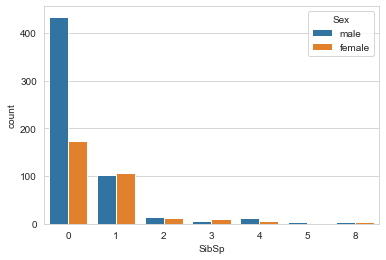

In [12]:
sns.countplot(x = "SibSp", hue = "Sex", data = df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

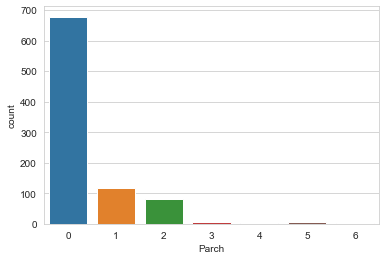

In [13]:
sns.countplot(x = "Parch", data = df)

<AxesSubplot:>

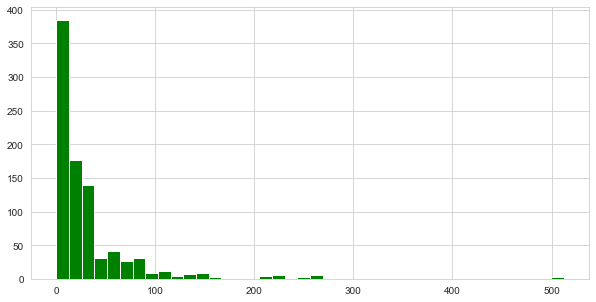

In [14]:
df['Fare'].hist(color = "green", bins = 40, figsize = (10,5))

In [15]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

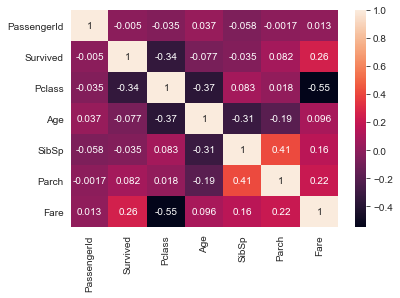

In [16]:
sns.heatmap(df.corr(), annot = True)

## DATA CLEANING

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

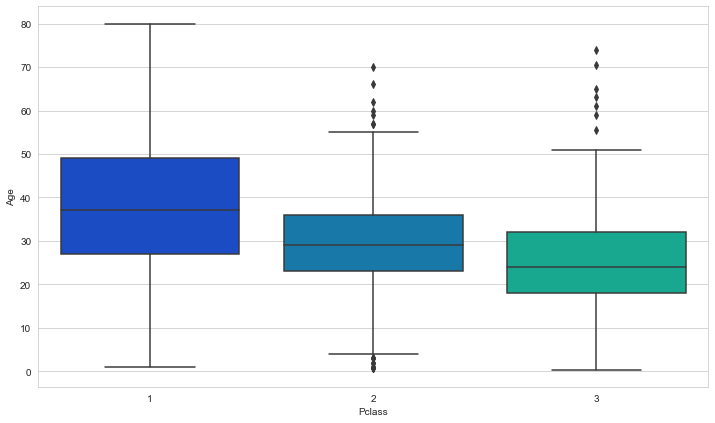

In [17]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass", y = "Age", data = df, palette = "winter")


In [18]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age) :
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else : return 24
    else : return Age

In [19]:
df["Age"] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [20]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

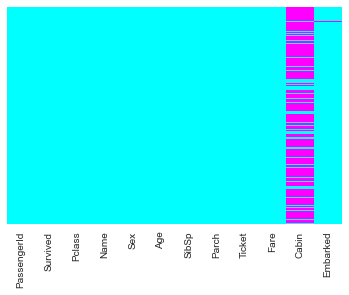

In [21]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap="cool")

In [22]:
df.drop('Cabin', axis = 1, inplace = True)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
#get_dummies : cinsiyet ve embarked leri kategorik hale getiririz,
sex = pd.get_dummies(df["Sex"], drop_first = True)
embark = pd.get_dummies(df["Embarked"], drop_first = True)
print(sex)
print(embark)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]
     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [25]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
df = pd.concat([df, sex,embark], axis =1)

In [27]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## MODEL

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
X = df.drop("Survived",axis = 1)
y = df["Survived"]

In [31]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [32]:
# Training
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr.score(X_test,y_test)

0.7910447761194029

In [35]:
y_pred = lr.predict(X_test)

In [36]:
scores = cross_val_score(lr, X_test, y_test, cv = 10)
print("cross val ; ", scores.mean())

cross val ;  0.8024216524216525


# Evaluation

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.78      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [39]:
cnf_matrix = confusion_matrix(y_pred,y_test)
cnf_matrix

array([[136,  35],
       [ 21,  76]])

Text(34.0, 0.5, 'Predicted Label')

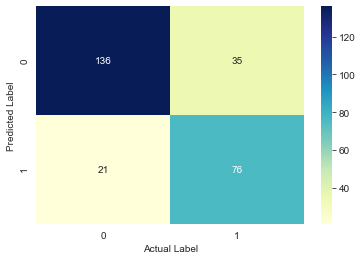

In [40]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")